# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

# Adding Probelm DataSet

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.shape

(571, 43)

# Checking Null values

In [5]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

# Filling NaN values

In [6]:
from sklearn.impute import SimpleImputer as smpt

In [7]:
cols = df.columns[1:]
imputer=smpt(missing_values=np.nan,strategy='most_frequent')
for i in cols:
    df[i]=imputer.fit_transform(df[i].values.reshape(-1,1))

In [8]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [9]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

# Insights Of Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     571 non-null    object 
 4   HS-105/12  571 non-null    object 
 5   MT-111     571 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     571 non-null    object 
 8   EL-102     571 non-null    object 
 9   EE-119     571 non-null    object 
 10  ME-107     571 non-null    object 
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    object 
 13  MT-222     571 non-null    object 
 14  EE-222     571 non-null    object 
 15  MT-224     571 non-null    object 
 16  CS-210     571 non-null    object 
 17  CS-211     571 non-null    object 
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

# Encoding Object Data columns

In [11]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [12]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412'],
      dtype='object')


In [13]:
for i in objList:
    df[i] = lab_enc.fit_transform(df[i].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    int32  
 1   PH-121     571 non-null    int32  
 2   HS-101     571 non-null    int32  
 3   CY-105     571 non-null    int32  
 4   HS-105/12  571 non-null    int32  
 5   MT-111     571 non-null    int32  
 6   CS-105     571 non-null    int32  
 7   CS-106     571 non-null    int32  
 8   EL-102     571 non-null    int32  
 9   EE-119     571 non-null    int32  
 10  ME-107     571 non-null    int32  
 11  CS-107     571 non-null    int32  
 12  HS-205/20  571 non-null    int32  
 13  MT-222     571 non-null    int32  
 14  EE-222     571 non-null    int32  
 15  MT-224     571 non-null    int32  
 16  CS-210     571 non-null    int32  
 17  CS-211     571 non-null    int32  
 18  CS-203     571 non-null    int32  
 19  CS-214     571 non-null    int32  
 20  EE-217    

# Checking Unique Values

In [14]:
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [15]:
df.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,164.977776,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,142.500000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,285.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,427.500000,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,570.000000,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


Text(0.5, 0, 'CGPA')

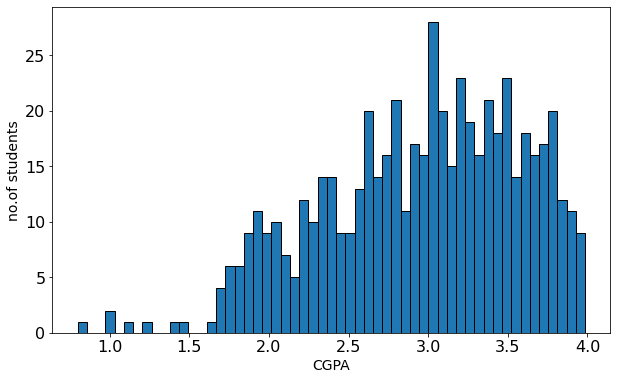

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df["CGPA"], bins=55, ec='black')
plt.ylabel("no.of students", fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel("CGPA", fontsize=14)

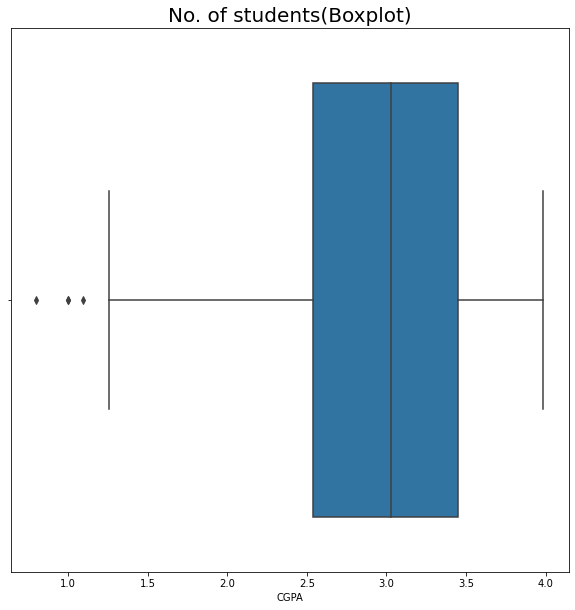

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot(df['CGPA'])
plt.title('No. of students(Boxplot)', fontsize=20)
plt.show()

With the above diagram we can under stood that there is only 3 outliers which are negligable and can't be removed because for those students also we need to find Avg.CGPA.

High no students lies in Q1,Q2

In [18]:
df.drop(['Seat No.'],axis=1,inplace=True)

In [165]:
corr = df.corr()
corr

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.663135
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.537170
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.658282
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.613989
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.730095
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.613169
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.534995
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642262
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.646829
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638,-0.663023


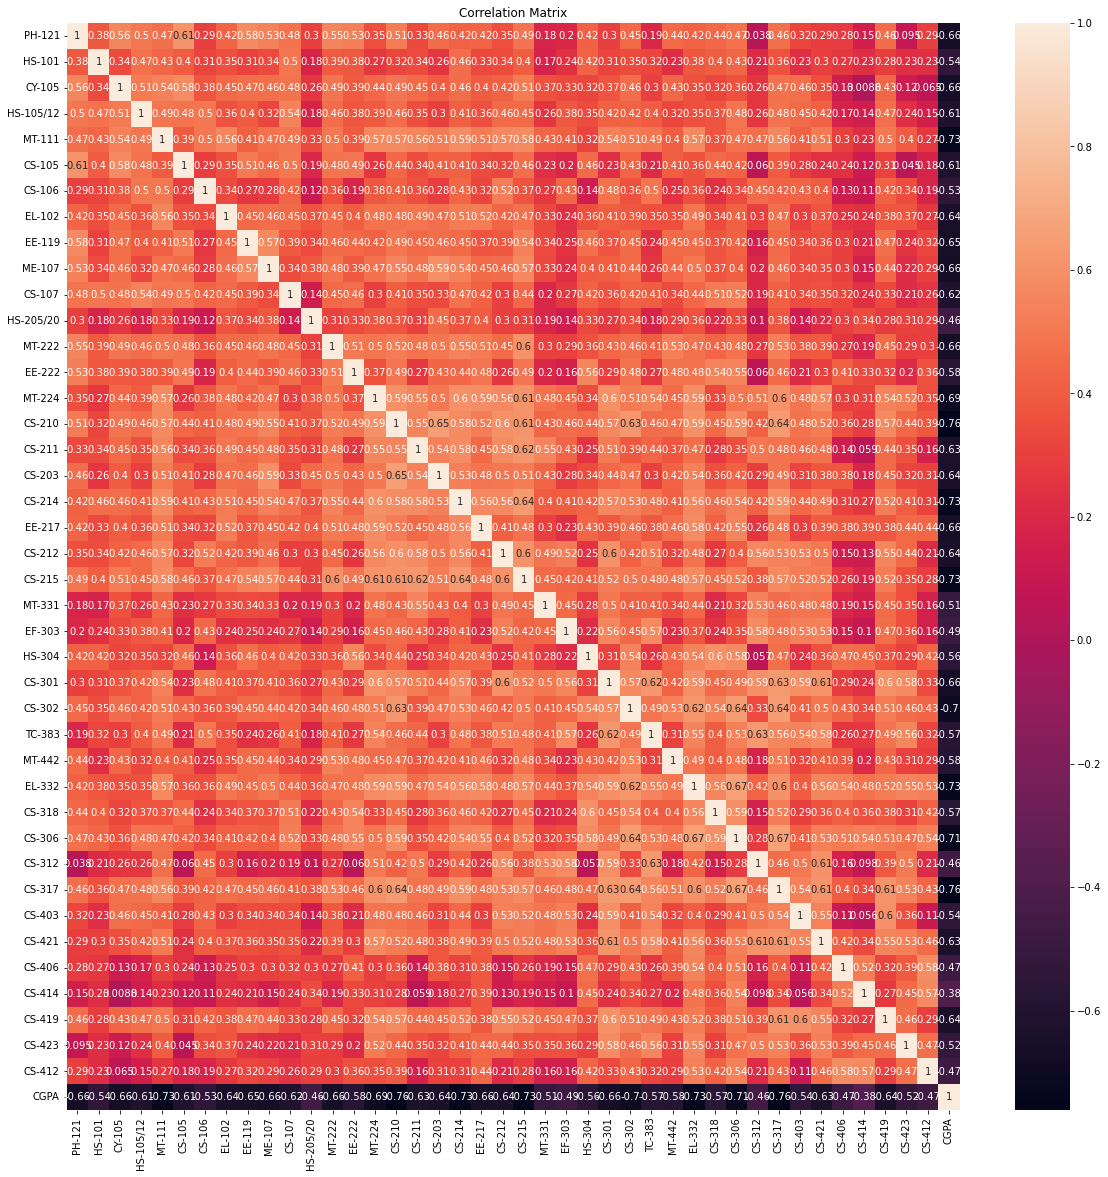

In [166]:
corr_mat = df.corr()
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.savefig("Correlation_matrix.jpg")
plt.show()

# With the above heat map we can identify that all grades highly correlated to Final CGPA.


# Model Builiding

In [167]:
X=df.drop(columns=['CGPA'],axis=1)
y=df['CGPA']

# Standardization of Data

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [170]:
X_scaled

array([[ 0.40040198,  1.77089951,  1.72226058, ...,  1.74051347,
        -0.34612103, -0.45017773],
       [-1.24205154,  1.4115592 ,  2.39744822, ...,  0.90041779,
         0.72798282, -0.02104337],
       [-1.24205154, -0.74448263, -0.97848996, ..., -1.61986925,
        -0.70415565, -1.30844646],
       ...,
       [-0.25657943, -1.82250355, -0.30330233, ...,  0.06032211,
        -0.70415565, -0.45017773],
       [-1.24205154, -0.38514232,  2.0598544 , ..., -0.35972573,
         0.3699482 ,  1.26635973],
       [ 0.72889268,  1.4115592 ,  2.0598544 , ...,  0.06032211,
         1.80208667,  2.12462846]])

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]

In [173]:
vif["features"] = X.columns
vif

,vif,features
0,2.827608,PH-121
1,1.771294,HS-101
2,2.514966,CY-105
3,2.293035,HS-105/12
4,2.638921,MT-111
5,2.366597,CS-105
6,1.927701,CS-106
7,1.968027,EL-102
8,2.190768,EE-119
9,2.294552,ME-107


With the above there is no high variance in between features

# Training and Splitting the Data

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=9)

# LinearRegression

In [176]:

from sklearn.linear_model import LinearRegression


In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

LR = LinearRegression()
LR.fit(x_train, y_train)

# Prediction:
y_pred = LR.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))

print(mean_squared_error(y_test, y_pred))

0.8544863323533652
0.06656195345828275


# MSE & MAE

In [178]:
mean_absolute_error(y_test,y_pred)

0.10252785918359171

In [179]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2579960338033954

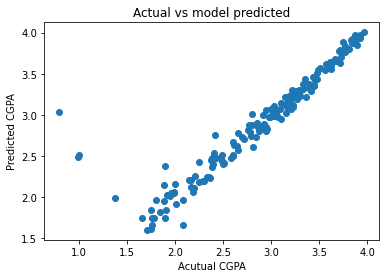

In [180]:
plt.scatter(y_test,y_pred)
plt.xlabel('Acutual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs model predicted')
plt.show()

# Ridge Regression

In [181]:

from sklearn.linear_model import Ridge,RidgeCV

ridge = Ridge()
ridge.fit(x_train, y_train)

# Prediction:
y_pred = ridge.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8544065871139996
0.06659843112390008


# MSE & MAE

In [182]:
mean_absolute_error(y_test,y_pred)

0.10235900764506312

In [183]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.25806671835767603

# Ridge Cross Validation

In [184]:
ridgeCV =RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgeCV.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [185]:
ridgeCV.alpha_

0.09099999999999998

In [186]:
ridge_model = Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [187]:
ridge_model.score(x_test,y_test)

0.8544790908427269

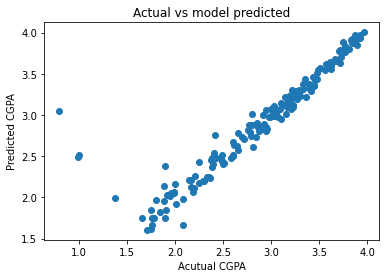

In [188]:
plt.scatter(y_test,y_pred)
plt.xlabel('Acutual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs model predicted')
plt.show()

# Lasso Regression model

In [189]:
from sklearn.linear_model import Lasso,LassoCV
lass= Lasso()

lass.fit(x_train, y_train)

# Prediction:
y_pred = lass.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-0.020673165022913942
0.46688397595306236


# MSE & MAE

In [190]:
mean_absolute_error(y_test,y_pred)

0.5491062685784228

In [191]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.6832890866632236

# Lasso Cross Validation

In [192]:
lasscv = LassoCV(alphas=None,max_iter = 999,normalize=True)

lasscv.fit(x_train,y_train)

LassoCV(max_iter=999, normalize=True)

In [193]:
alpha=lasscv.alpha_

alpha

0.00010069323856843272

In [194]:
lasso_reg = Lasso(alpha = 1.87)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.87)

In [195]:
lasso_reg.score(x_test,y_test)

-0.020673165022913942

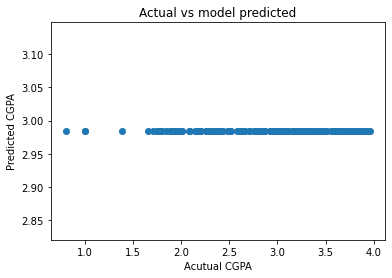

In [196]:
plt.scatter(y_test,y_pred)
plt.xlabel('Acutual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs model predicted')
plt.show()

# Random Forest Regressor:

In [197]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Prediction:
y_pred =rf.predict(x_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.861270741600999
0.06345857808546505


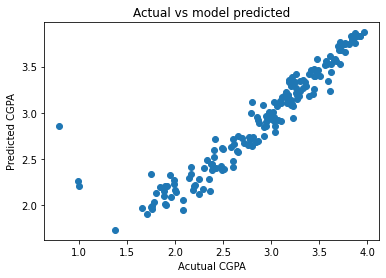

In [198]:
plt.scatter(y_test,y_pred)
plt.xlabel('Acutual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs model predicted')
plt.show()

# MSE & MAE

In [199]:
mean_absolute_error(y_test,y_pred)

0.1361751744186045

In [200]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2519098610326024

# Ada Boost Model Training

In [201]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [202]:
ada = AdaBoostRegressor()

In [203]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [204]:
y_pred=ada.predict(x_train)

In [205]:
accuracy=metrics.r2_score(y_train,y_pred)
print('R Square score',accuracy)

R Square score 0.9416630534655932


In [206]:
y_test_pred = ada.predict(x_test)

In [207]:
accuracy=metrics.r2_score(y_test,y_test_pred)

In [208]:
print('R Square score', accuracy)

R Square score 0.8597278386324313


# Hyper Parameter Tuning using Randomized searchCV

In [209]:
from sklearn.model_selection import RandomizedSearchCV

In [210]:
params={'n_estimators':[47,50,60,70],
       'learning_rate':[0.25,0.30,0.40]}

In [211]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [212]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=60)

In [213]:
ada=AdaBoostRegressor(learning_rate=0.27,n_estimators=50)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print("***Accuracy post Tuning*******")
print(metrics.r2_score(y_test,y_pred))

***Accuracy post Tuning*******
0.8482256332590841


In [214]:
import pickle
filename = 'Grades of students.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))

# Hence Random Forest REgressor showing high performance